# STAT 557 - Data Mining 

By: Rakshith Badarinath 

## Project 2: k-means, k-center and k-NN

The aim of this project is to practice the k-means algorithm and the k-nearest neighbor algorithm. 

Requirements for the project are listed below.
1. Apply the k-means algorithm to your dataset. Study how the error rates within the training set and on the testing set change with the number of prototypes.
2. Use cross-validation to choose the number of prototypes.
3. Explore whether dimension reduction can improve classiﬁcation by the k-means algorithm.
4. Apply the k-nearest neighbor algorithm to your dataset. Study how the error rates within the training set and on the testing set change with k.
5. Unsupervised clustering: Ignore the class labels. Use the ﬁrst two principle components of the data. Apply k-center and k-means clustering to two dimensional data. Compare the results using scatter plot. Try several different numbers of clusters.
6. Write a report. In the report, you are required to explain the contribution of each individual group member.


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## k-NN Classifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## About Wine Data

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three
different cultivars.

The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

-- The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it)

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline            

Number of Instances:
1. class 1: 59
2. class 2: 71
3. class 3: 48

Total number of samples: 178

Number of Attributes: 13

All attributes are continuous
		
Missing Attribute Values: None

### Import Data

In [3]:
from sklearn.datasets import load_wine 

X, y = load_wine(return_X_y=True)
feature_names=['Alcohol', 'Malic Acid','Ash', 'Alcalinity of ash','Magnesium','Total Phenols','Flavanoids', 'Non-Flavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines','Proline']
target_names=['class 0', 'class 1', 'class 2']
class_label = ['Class Label']

# create table for representation
data = pd.DataFrame(data=X, columns=feature_names)
wine_data = data.assign(class_label=y) #add new column for class label
#wine_data['Class Label'] = y # Option-2

In [4]:
# Display Wine Data
wine_data

Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Total Phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
5      14.20        1.76  2.45               15.2      112.0           3.27   
6      14.39        1.87  2.45               14.6       96.0           2.50   
7      14.06        2.15  2.61               17.6      121.0           2.60   
8      14.83        1.64  2.17               14.0       97.0           2.80   
9      13.86        1.35  2.27               16.0       98.0           2.98   
10     14.10        2.16  2.30               18.0      105.0           2.95   
11     14.12        1.48  2.32               16.8       95.0           2.20   
12     13.75        1.73  2.41               16.0       89.0           2.60   
13     14.75        1.73  2.39               11.4       91.0           3.10   
14     14.38        1.87  2.38               12.0      102.0           3.30   
15     13.63        1.81  2.70               17.2      112.0           2.85   
16     14.30        1.92  2.72               20.0      120.0           2.80   
17     13.83        1.57  2.62               20.0      115.0           2.95   
18     14.19        1.59  2.48               16.5      108.0           3.30   
19     13.64        3.10  2.56               15.2      116.0           2.70   
20     14.06        1.63  2.28               16.0      126.0           3.00   
21     12.93        3.80  2.65               18.6      102.0           2.41   
22     13.71        1.86  2.36               16.6      101.0           2.61   
23     12.85        1.60  2.52               17.8       95.0           2.48   
24     13.50        1.81  2.61               20.0       96.0           2.53   
25     13.05        2.05  3.22               25.0      124.0           2.63   
26     13.39        1.77  2.62               16.1       93.0           2.85   
27     13.30        1.72  2.14               17.0       94.0           2.40   
28     13.87        1.90  2.80               19.4      107.0           2.95   
29     14.02        1.68  2.21               16.0       96.0           2.65   
..       ...         ...   ...                ...        ...            ...   
148    13.32        3.24  2.38               21.5       92.0           1.93   
149    13.08        3.90  2.36               21.5      113.0           1.41   
150    13.50        3.12  2.62               24.0      123.0           1.40   
151    12.79        2.67  2.48               22.0      112.0           1.48   
152    13.11        1.90  2.75               25.5      116.0           2.20   
153    13.23        3.30  2.28               18.5       98.0           1.80   
154    12.58        1.29  2.10               20.0      103.0           1.48   
155    13.17        5.19  2.32               22.0       93.0           1.74   
156    13.84        4.12  2.38               19.5       89.0           1.80   
157    12.45        3.03  2.64               27.0       97.0           1.90   
158    14.34        1.68  2.70               25.0       98.0           2.80   
159    13.48        1.67  2.64               22.5       89.0           2.60   
160    12.36        3.83  2.38               21.0       88.0           2.30   
161    13.69        3.26  2.54               20.0      107.0           1.83   
162    12.85        3.27  2.58               22.0      106.0           1.65   
163    12.96        3.45  2.35               18.5      106.0           1.39   
164    13.78        2.76  2.30               22.0       90.0           1.35   
165    13.73        4.36  2.26               22.5       88.0           1.28   
166    13.45        3.70  2.60               23.0      

### Initial Exploratory Data Analysis

### Feature Pair Plot

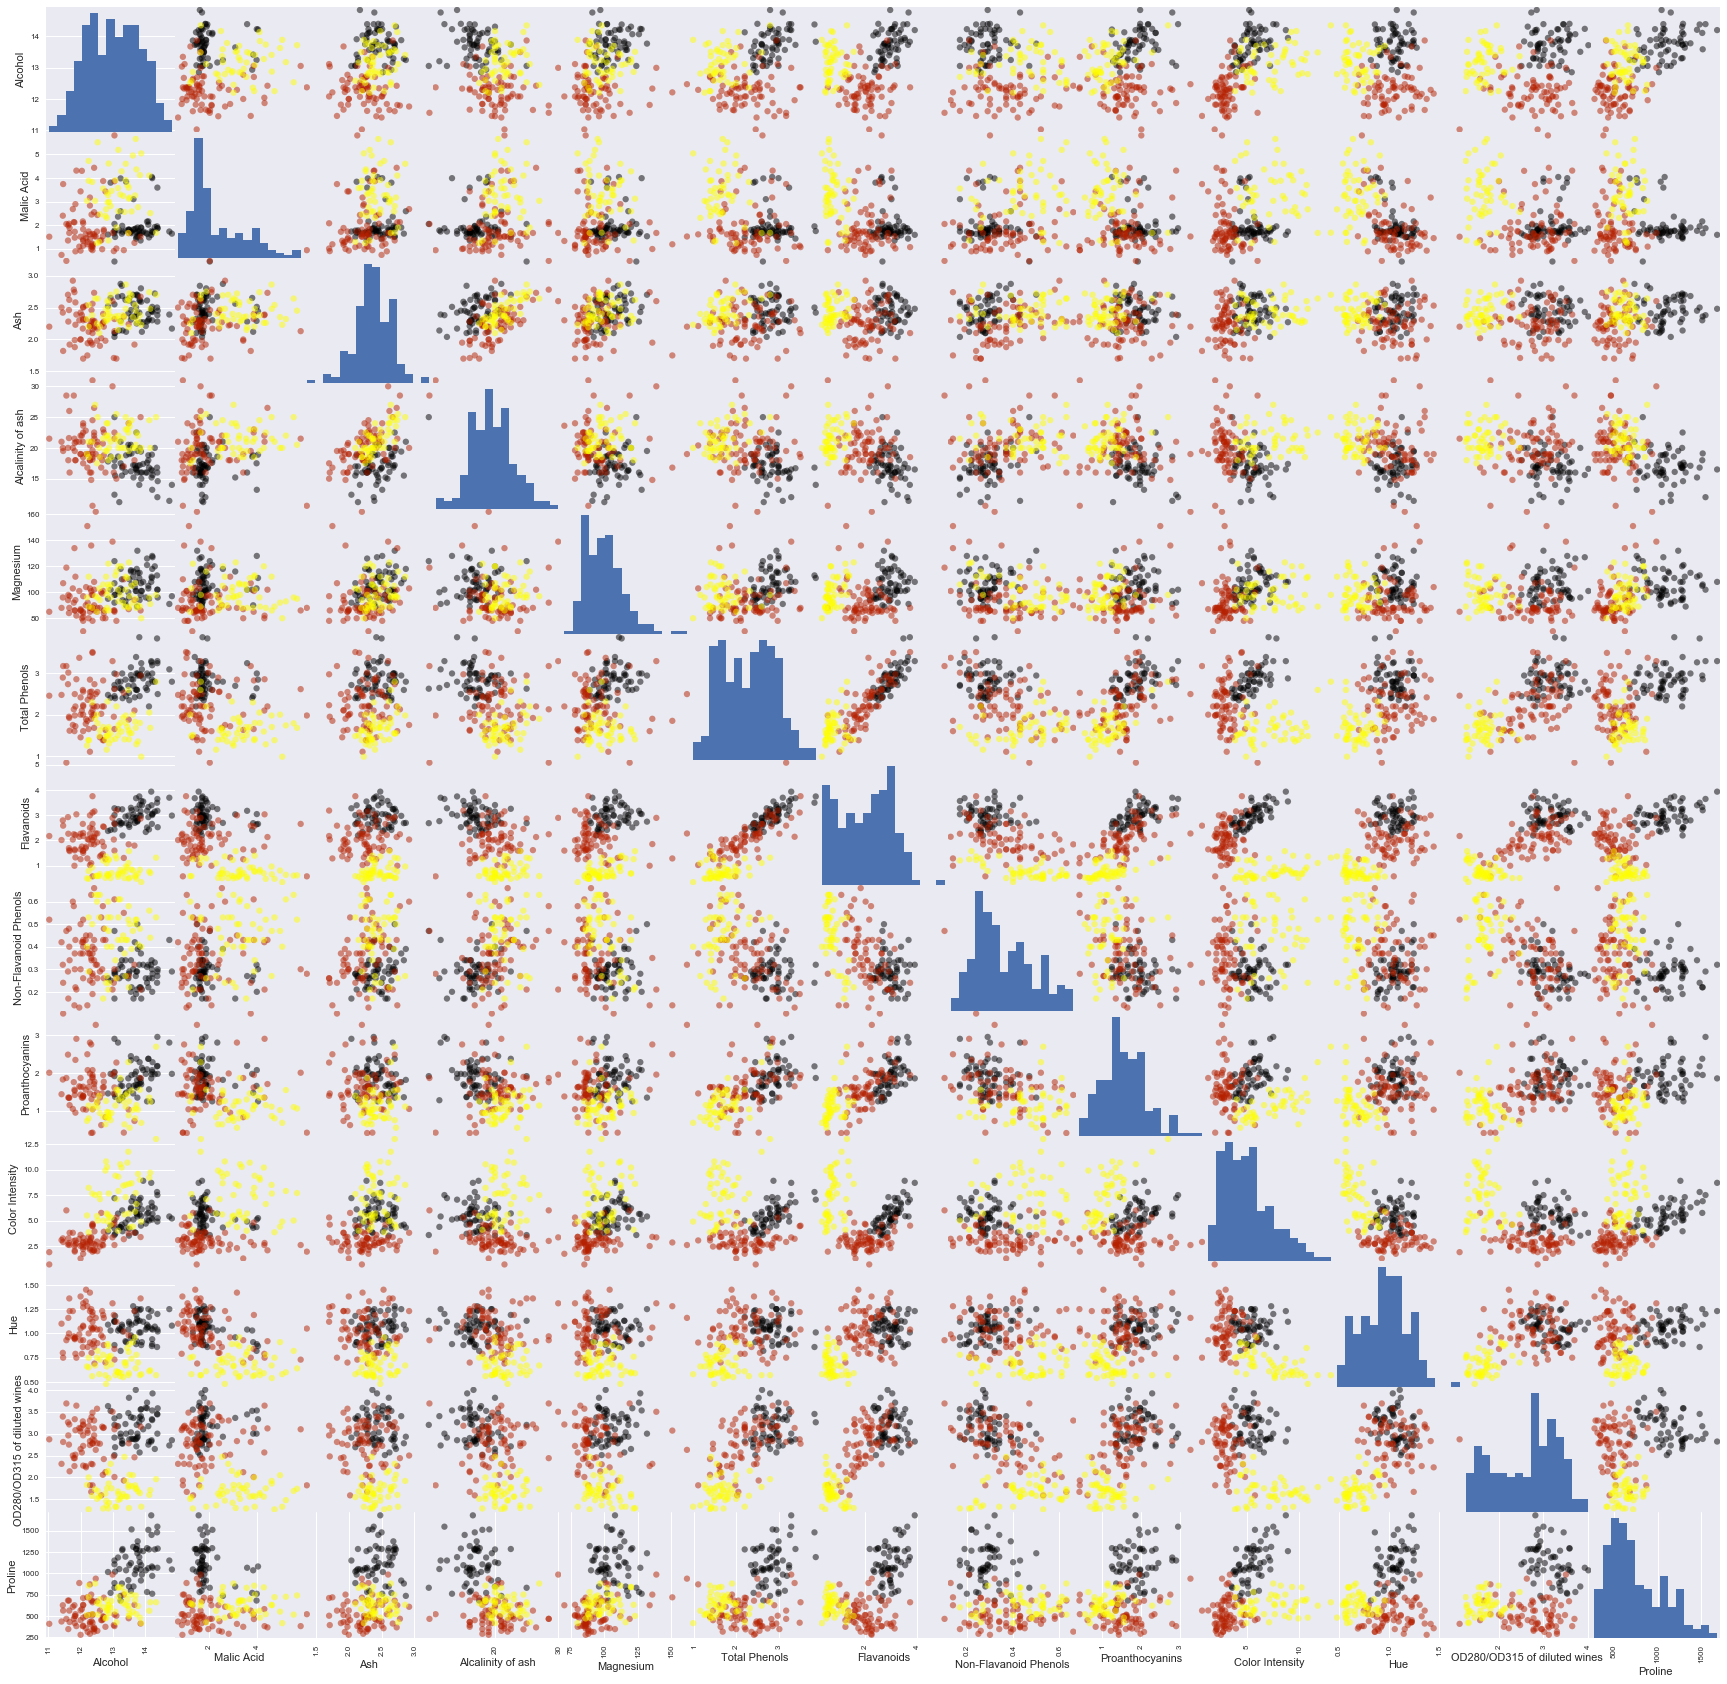

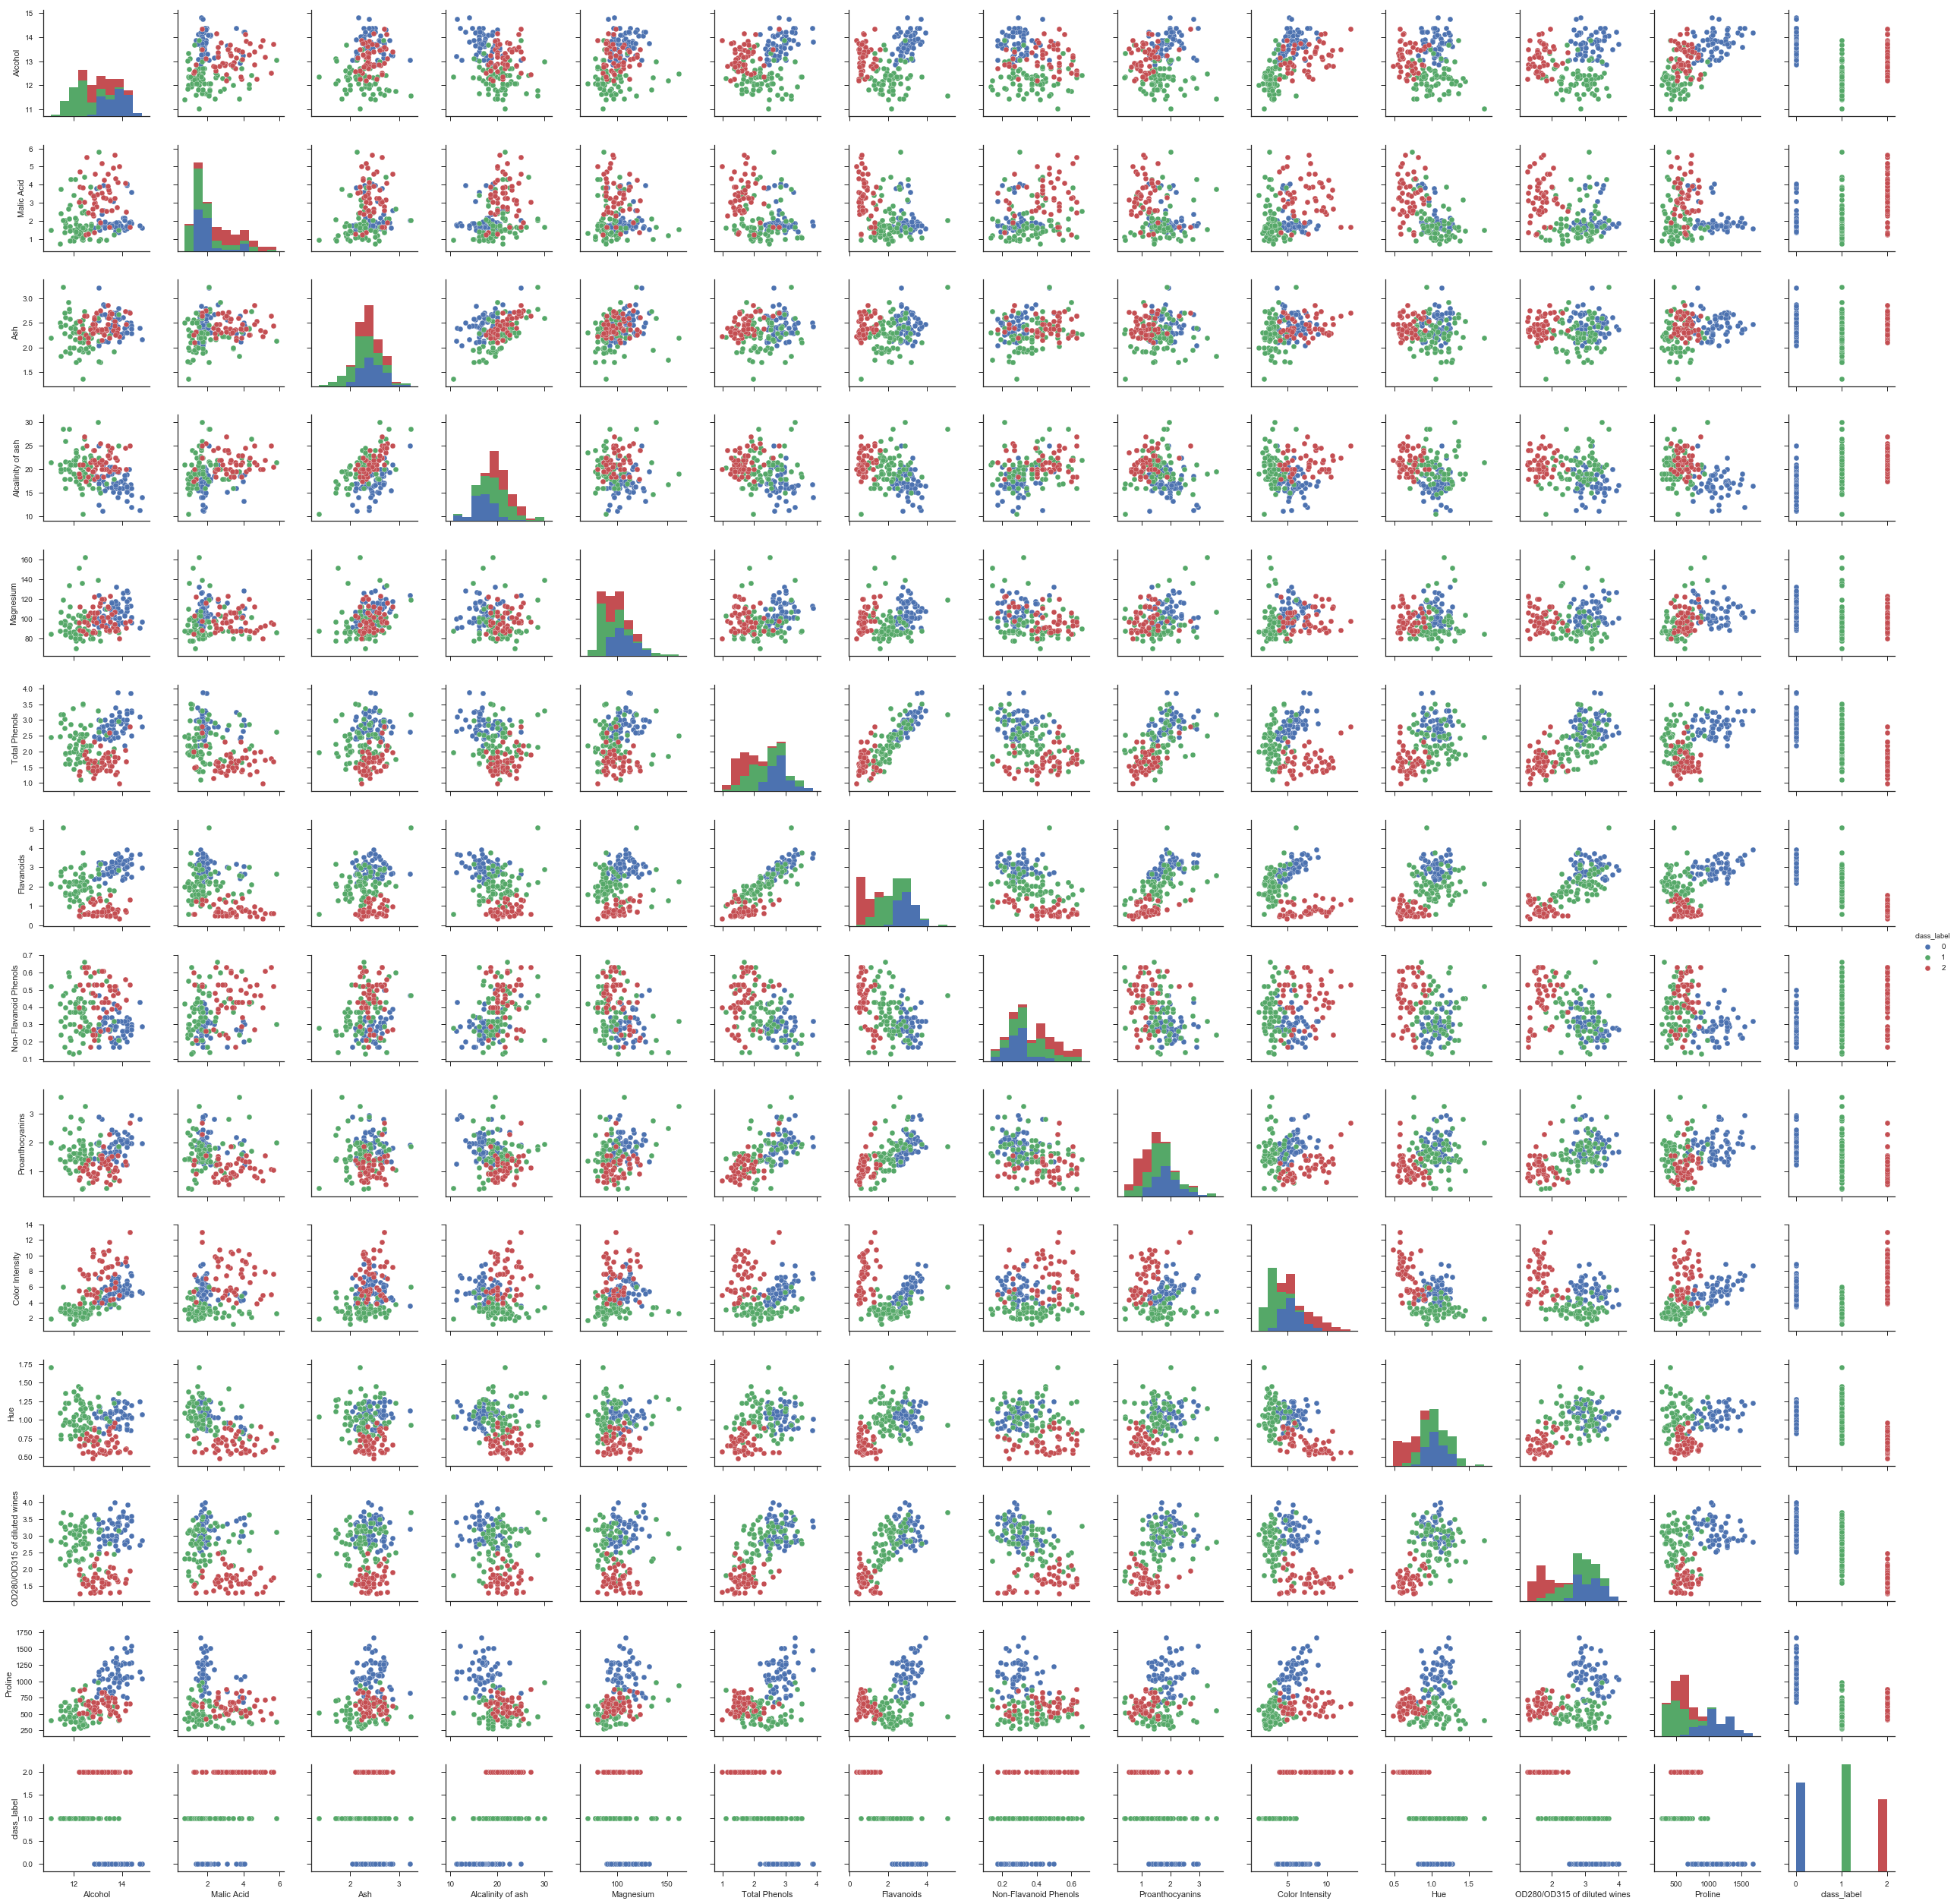

In [5]:
# Plotting a Pair plot scatter matrix - Pndas Scatter Matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix

X_wine = wine_data[['Alcohol', 'Malic Acid','Ash', 'Alcalinity of ash','Magnesium','Total Phenols','Flavanoids', 'Non-Flavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines','Proline']]
y_wine = wine_data['class_label']
fig = plt.figure()
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_wine, c=y_wine, marker='o', s=40, hist_kwds={'bins':15}, figsize=(30,30), cmap=cmap)

# Plotting a Pair plot scatter matrix - Seaborn Pairplot Scatter Matrix
sn.set(style="ticks", color_codes=True) # change style

sn.pairplot(wine_data, hue="class_label")
plt.show()

### Correlation Matrix

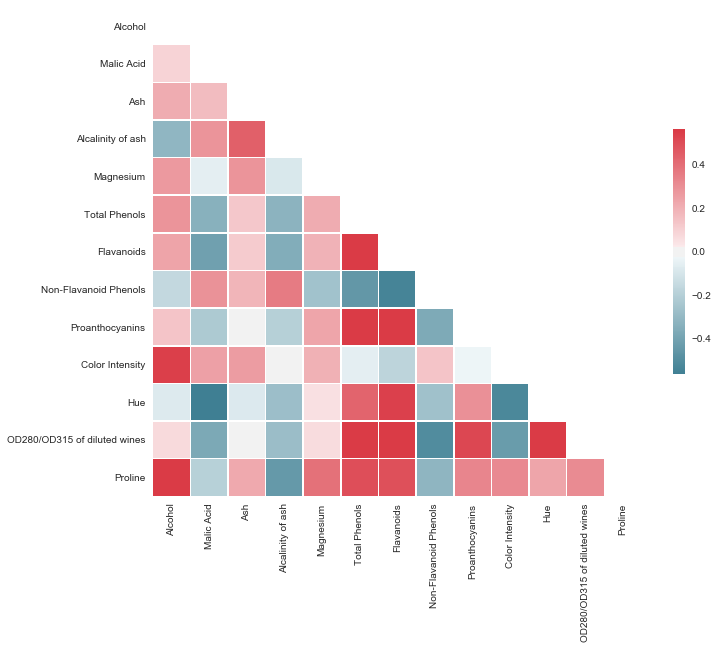

In [6]:
sn.set(style="white")

# Compute the correlation matrix
corr = X_wine.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Split the data into Test  and Train sets (Random Split) 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, random_state=0)

### Scaling Data - Min Max (Optional)

In [8]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# # we must apply the scaling to the test set that we computed for the training set
# X_test_scaled = scaler.transform(X_test)

## Fit k-NN Model 

In [9]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Compute Performance Metrics

### Accuracy Scores

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.73


### Cross Validation Results

In [11]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X, y,cv=5) #5-fold cross validation

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores {5-fold}:  [ 0.7027027   0.66666667  0.63888889  0.65714286  0.76470588]
Mean cross-validation score (5-fold): 0.686


### Classification Report

In [12]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85        16
          1       0.81      0.81      0.81        21
          2       0.29      0.25      0.27         8

avg / total       0.72      0.73      0.73        45



### Confusion Matrix

In [13]:
print(confusion_matrix(y_test,y_pred))

[[14  1  1]
 [ 0 17  4]
 [ 3  3  2]]


## How sensitive is k-NN classification accuracy to choice of 'k' parameter

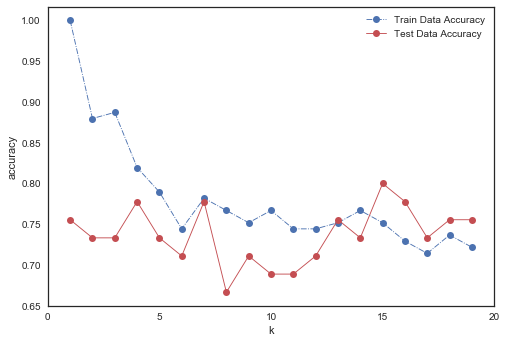

In [14]:
k_range = range(1,20)
scores_train = []
scores_test = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_train.append(knn.score(X_train, y_train))
    scores_test.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
#plt.scatter(k_range, scores)
plt.plot(k_range, scores_train, 'bo-.', linewidth=0.9,label='Train Data Accuracy')
plt.plot(k_range, scores_test,'ro-',linewidth=0.9, label='Test Data Accuracy')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xticks([0,5,10,15,20]);
plt.show()

## k-NN Classification Boundaries

### Define functions to plot classifier boundaries

In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

#cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

In [16]:
# Different plotting functions

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

        
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()
    
def plot_class_regions_for_classifier_PCA2d(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Plot Classifier Boundaries

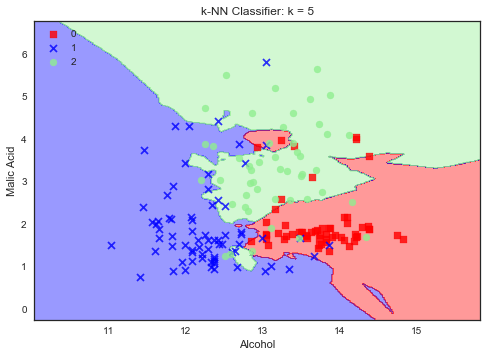

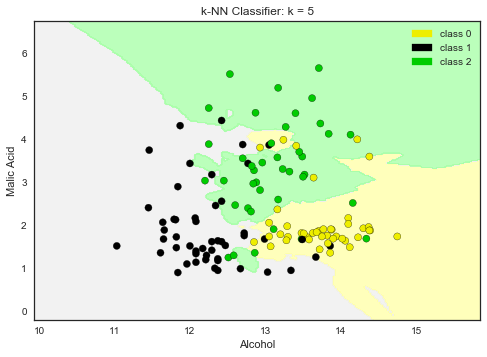

In [17]:
X_wine_2d = X_wine[['Alcohol','Malic Acid']]

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_wine_2d, y_wine, random_state=0)

# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.fit_transform(X_test)

X_combined_std = np.vstack((X_train_2d, X_test_2d))
y_combined = np.hstack((y_train_2d, y_test_2d))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2d, y_train_2d)

plot_decision_regions(X_combined_std, y_combined, classifier=knn)
plt.title('k-NN Classifier: k = 5')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.show()

plot_class_regions_for_classifier(knn, np.asarray(X_train_2d), np.asarray(y_train_2d), None, None,'k-NN Classifier: k = 5',target_names=target_names)



## How does Classifier Boundaries vary with choice of 'k'

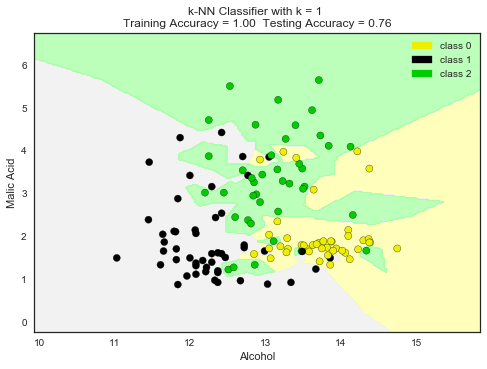

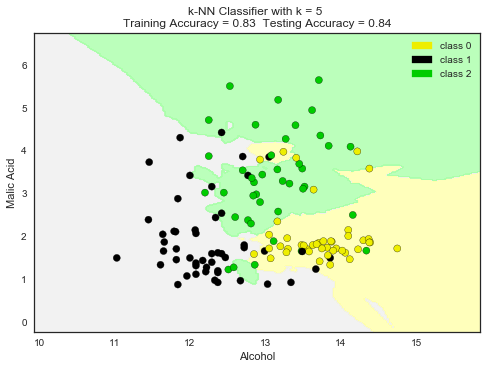

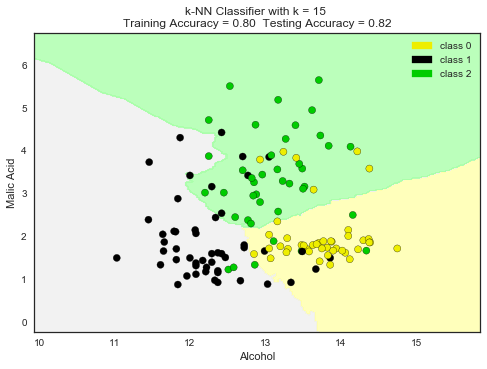

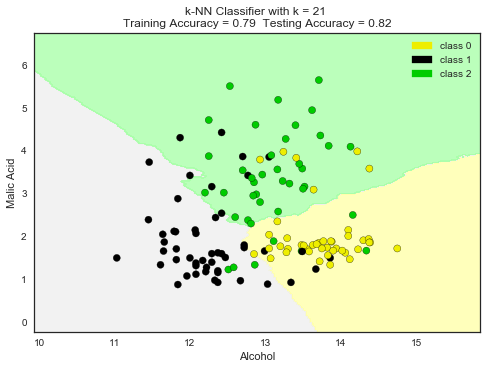

In [18]:
# Need subplots showing testing and train errors at top with k value 

for k in [1, 5, 15, 21]:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train_2d, y_train_2d)
    
    title = 'k-NN Classifier with k = {} \nTraining Accuracy = {:.2f}  Testing Accuracy = {:.2f}'.format(k,clf.score(X_train_2d, y_train_2d),clf.score(X_test_2d, y_test_2d))
    
    plot_class_regions_for_classifier(clf, np.asarray(X_train_2d), np.asarray(y_train_2d)
                                      , None, None,title,target_names=target_names)
    

## Scaling Data 

Feature scaling though standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

To illustrate this, PCA is performed comparing the use of data with StandardScaler applied, to unscaled data. The results are visualized and a clear difference noted. The 1st principal component in the unscaled set can be seen. It can be seen that feature #13 dominates the direction, being a whole two orders of magnitude above the other features. This is contrasted when observing the principal component for the scaled version of the data. In the scaled version, the orders of magnitude are roughly the same across all the features.

The dataset used is the Wine Dataset available at UCI. This dataset has continuous features that are heterogeneous in scale due to differing properties that they measure (i.e alcohol content, and malic acid).

The transformed data is then used to train a naive Bayes classifier, and a clear difference in prediction accuracies is observed wherein the dataset which is scaled before PCA vastly outperforms the unscaled version.

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X_wine_scaled = StandardScaler().fit_transform(X_wine)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_wine_scaled, y_wine, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Performance Metrics of Scaled Data

In [21]:
# Train and test accuracy scores
y_pred = knn.predict(X_test_scaled)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

# Cross validation

cv_scores = cross_val_score(knn, X_wine_scaled, y,cv=5) #5-fold cross validation

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

# Classification report
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.98
Cross-validation scores {5-fold}:  [ 0.91891892  0.97222222  0.97222222  1.          0.91176471]
Mean cross-validation score (5-fold): 0.955
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.95      0.98        21
          2       0.89      1.00      0.94         8

avg / total       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 20  1]
 [ 0  0  8]]


## Variation of Train and Test Accuracies w.r.t 'k' for scaled data

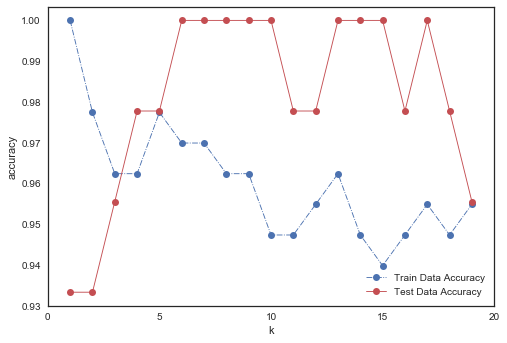

In [22]:
k_range = range(1,20)
scores_train = []
scores_test = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores_train.append(knn.score(X_train_scaled, y_train))
    scores_test.append(knn.score(X_test_scaled, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
#plt.scatter(k_range, scores)
plt.plot(k_range, scores_train, 'bo-.', linewidth=0.9,label='Train Data Accuracy')
plt.plot(k_range, scores_test,'ro-',linewidth=0.9, label='Test Data Accuracy')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xticks([0,5,10,15,20]);
plt.show()

### Plot Classifier Boundaries for Scaled Data

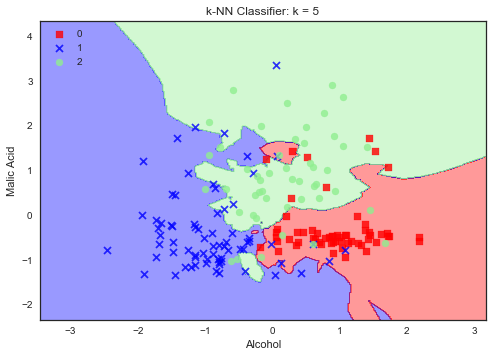

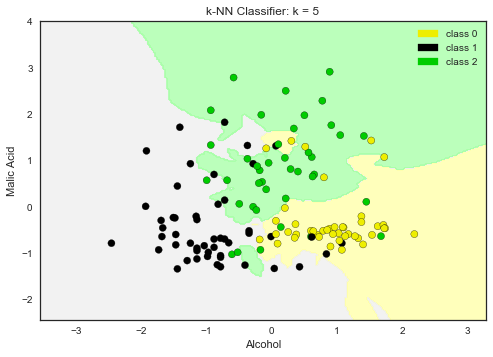

In [23]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_2d)
X_test_std = sc.fit_transform(X_test_2d)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train_2d, y_test_2d))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train_2d)

plot_decision_regions(X_combined_std, y_combined, classifier=knn)
plt.title('k-NN Classifier: k = 5')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.show()

plot_class_regions_for_classifier(knn, np.asarray(X_train_std), np.asarray(y_train_2d), None, None,'k-NN Classifier: k = 5',target_names=target_names)



## How does Classifier Boundaries vary with choice of 'k' - Scaled Data

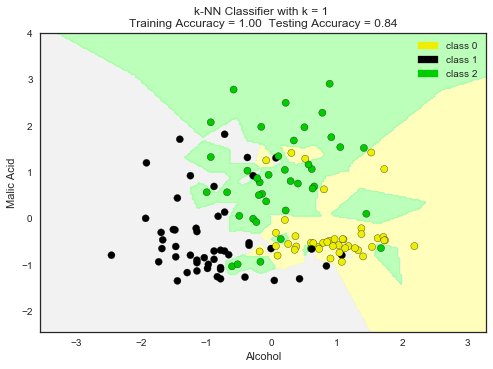

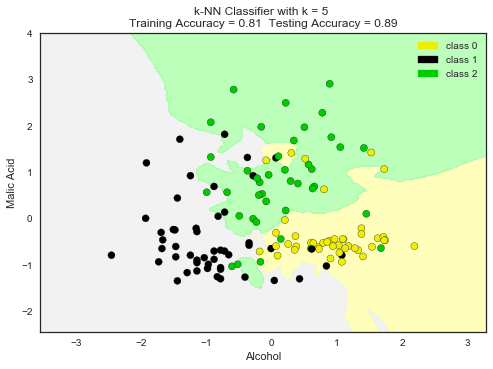

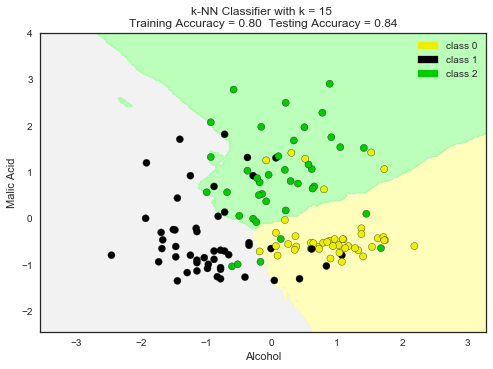

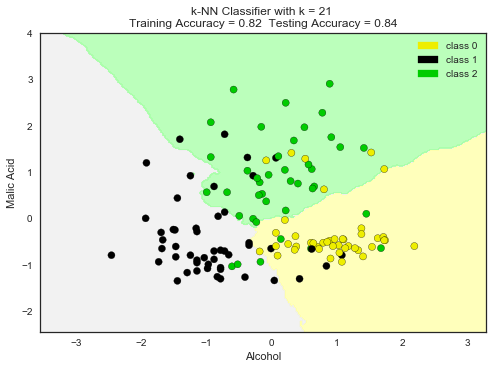

In [24]:
# Need subplots showing testing and train errors at top with k value 

for k in [1, 5, 15, 21]:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train_std, y_train_2d)
    
    title = 'k-NN Classifier with k = {} \nTraining Accuracy = {:.2f}  Testing Accuracy = {:.2f}'.format(k,clf.score(X_train_std, y_train_2d),clf.score(X_test_std, y_test_2d))
    
    plot_class_regions_for_classifier(clf, np.asarray(X_train_std), np.asarray(y_train_2d)
                                      , None, None,title,target_names=target_names)

## Dimension Reduction using PCA

### Comparing Original and Scaled data reduced using PCA

In [25]:
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

FIG_SIZE = (10, 7)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_wine)
# Percentage of variance explained for each components 
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# Test-train split on PCA reduced data
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca,y_wine,random_state=0) 

# Fit to data and predict using pipelined k-NN and PCA.
unscaled_clf = KNeighborsClassifier(n_neighbors = 5)
unscaled_clf.fit(X_pca_train, y_pca_train)
pred_test = unscaled_clf.predict(X_pca_test)

# Fit to data and predict using pipelined scaling, k-NN and PCA.
# SCale and then apply pca

pca_std = PCA(n_components=2)
X_pca_scaled = pca_std.fit_transform(X_wine_scaled)

# Percentage of variance explained for each components 
print('explained variance ratio (first two components): %s'
      % str(pca_std.explained_variance_ratio_))

X_pca_train_scaled, X_pca_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_pca_scaled, y_wine, random_state=0)

std_clf = KNeighborsClassifier(n_neighbors = 5)
std_clf.fit(X_pca_train_scaled, y_train_scaled)
pred_test_std = std_clf.predict(X_pca_test_scaled)

explained variance ratio (first two components): [ 0.99809123  0.00173592]
explained variance ratio (first two components): [ 0.36198848  0.1920749 ]


### Compute Performance Metrics for PCA reduced Data

In [26]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(std_clf.score(X_pca_train_scaled, y_train_scaled)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(std_clf.score(X_pca_test_scaled, y_test_scaled)))

# Cross validation
cv_scores = cross_val_score(std_clf, X_pca_scaled, y_wine,cv=5) #5-fold cross validation

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

# Classification report
print(classification_report(y_test_scaled,pred_test_std))

# Confusion Matrix
print(confusion_matrix(y_test_scaled,pred_test_std))

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA: {:.2%}\n'.format(metrics.accuracy_score(y_pca_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA: {:.2%}\n'.format(metrics.accuracy_score(y_test_scaled, pred_test_std)))

# Show first principal componenets
print('Principal components for original data reduced using PCA')
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPrincipal components for scaled data reduced using PCA')
print('\nPC 1 with scaling:\n', pca_std.components_[0])


Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.98
Cross-validation scores {5-fold}:  [ 0.94594595  0.97222222  0.97222222  0.97142857  0.97058824]
Mean cross-validation score (5-fold): 0.966
             precision    recall  f1-score   support

          0       0.94      1.00      0.97        16
          1       1.00      0.95      0.98        21
          2       1.00      1.00      1.00         8

avg / total       0.98      0.98      0.98        45

[[16  0  0]
 [ 1 20  0]
 [ 0  0  8]]

Prediction accuracy for the normal test dataset with PCA: 68.89%


Prediction accuracy for the standardized test dataset with PCA: 97.78%

Principal components for original data reduced using PCA

PC 1 without scaling:
 [  1.65926472e-03  -6.81015556e-04   1.94905742e-04  -4.67130058e-03
   1.78680075e-02   9.89829680e-04   1.56728830e-03  -1.23086662e-04
   6.00607792e-04   2.32714319e-03   1.71380037e-04   7.04931645e-04
   9.99822937e-01]

Principal 

## Plot Decision Boundaries for PCA reduced Data classified using k-NN (k=5)

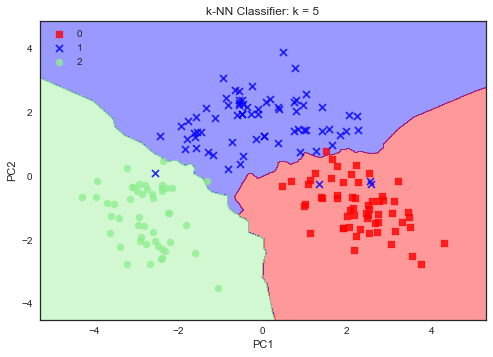

In [27]:
#sc = StandardScaler()
#X_train_std = sc.fit_transform(X_train_2d)
#X_test_std = sc.fit_transform(X_test_2d)

X_combined_std = np.vstack((X_pca_train_scaled, X_pca_test_scaled))
y_combined = np.hstack((y_train_scaled, y_test_scaled))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca_train_scaled, y_train_scaled)

plot_decision_regions(X_combined_std, y_combined, classifier=knn)
plt.title('k-NN Classifier: k = 5')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.show()

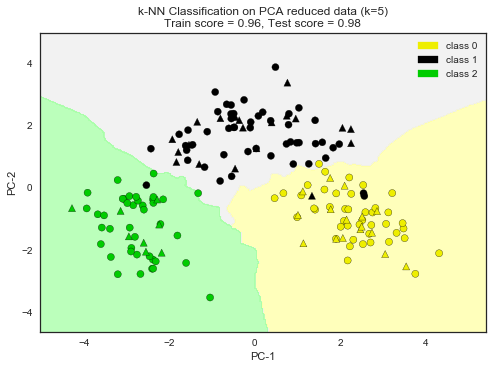

In [28]:
titlePCA = 'k-NN Classification on PCA reduced data (k=5)'
plot_class_regions_for_classifier_PCA2d(std_clf, np.asarray(X_pca_train_scaled), np.asarray(y_train_scaled), X_pca_test_scaled, y_test_scaled,titlePCA, target_names=target_names)

In [35]:
x_pca
X_pca = pd.DataFrame(data=x_pca,columns=['PC1','PC2'])
X_pca = X_pca.assign(class_label=y_wine) #add new column for class
X_pca
_34.to_csv('PCA_Wine_Data.csv')